# Đọc dữ liệu

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Yêu cầu 1.3

In [4]:
data = pd.read_csv('train.csv')

In [5]:
print('Số dòng:', data.shape[0])
print('Các cột:')
print(np.array(data.columns))

Số dòng: 1647
Các cột:
['Make' 'Model' 'Price' 'Year' 'Kilometer' 'Fuel Type' 'Transmission'
 'Location' 'Color' 'Owner' 'Seller Type' 'Engine' 'Max Power'
 'Max Torque' 'Drivetrain' 'Length' 'Width' 'Height' 'Seating Capacity'
 'Fuel Tank Capacity']


In [6]:
print('5 Dòng đầu tiên của data:')
data.head()

5 Dòng đầu tiên của data:


,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,BMW,3-Series 320d,800000,2012,75576,Diesel,Automatic,Mumbai,White,Second,Individual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BMW,X1 sDrive20d xLine,2199000,2016,77000,Diesel,Automatic,Surat,Black,First,Individual,1995 cc,184 bhp @ 4000 rpm,350 Nm @ 1750 rpm,RWD,4454.0,2044.0,1545.0,5.0,63.0
2,Mahindra,XUV500 W4 1.99,800000,2017,112000,Diesel,Manual,Muzaffurpur,Silver,First,Individual,1997 cc,138 bhp @ 3750 rpm,320 Nm @ 1600 rpm,FWD,4585.0,1890.0,1785.0,7.0,70.0
3,Mercedes-Benz,GLS 400d 4MATIC,12900000,2021,3000,Diesel,Automatic,Delhi,White,First,Individual,2925 cc,326 bhp @ 3600 rpm,700 Nm @ 1200 rpm,AWD,5207.0,2157.0,1823.0,7.0,90.0
4,Toyota,Fortuner 2.8 4x2 AT [2016-2020],3499000,2019,73000,Diesel,Automatic,Mumbai,White,First,Individual,2755 cc,174 bhp @ 3400 rpm,450 Nm @ 1600 rpm,RWD,4795.0,1855.0,1835.0,7.0,80.0


# Data preprocessing

## Tách các cột

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1647 entries, 0 to 1646
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                1647 non-null   object 
 1   Model               1647 non-null   object 
 2   Price               1647 non-null   int64  
 3   Year                1647 non-null   int64  
 4   Kilometer           1647 non-null   int64  
 5   Fuel Type           1647 non-null   object 
 6   Transmission        1647 non-null   object 
 7   Location            1647 non-null   object 
 8   Color               1647 non-null   object 
 9   Owner               1647 non-null   object 
 10  Seller Type         1647 non-null   object 
 11  Engine              1582 non-null   object 
 12  Max Power           1582 non-null   object 
 13  Max Torque          1582 non-null   object 
 14  Drivetrain          1536 non-null   object 
 15  Length              1595 non-null   float64
 16  Width 

In [8]:
data["Engine"] = data["Engine"].str.replace(' cc', '', regex=False).astype(float)

In [9]:
def extract_max_power(power_str):
    if isinstance(power_str, float):
        return np.nan, np.nan
    parts = power_str.split('@')
    bhp_part = parts[0]
    rpm_part = parts[1]
    bhp_value = float(bhp_part.split(' bhp')[0])
    try:
        rpm_value = float(rpm_part.split(' rpm')[0])
    except:
        return bhp_value, np.nan
    return bhp_value, rpm_value

data[['Max Power bhp', 'Max Power rpm']] = data['Max Power'].apply(lambda x: pd.Series(extract_max_power(x)))
data.drop(columns=['Max Power'], inplace=True)

In [10]:
def extract_max_power(power_str):
    if isinstance(power_str, float):
        return np.nan, np.nan
    parts = power_str.split('@')
    bhp_part = parts[0]
    rpm_part = parts[1]
    bhp_value = float(bhp_part.split(' Nm')[0])
    try:
        rpm_value = float(rpm_part.split(' rpm')[0])
    except:
        return bhp_value, np.nan
    return bhp_value, rpm_value

data[['Max Torque Nm', 'Max Torque rpm']] = data['Max Torque'].apply(lambda x: pd.Series(extract_max_power(x)))
data.drop(columns=['Max Torque'], inplace=True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1647 entries, 0 to 1646
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                1647 non-null   object 
 1   Model               1647 non-null   object 
 2   Price               1647 non-null   int64  
 3   Year                1647 non-null   int64  
 4   Kilometer           1647 non-null   int64  
 5   Fuel Type           1647 non-null   object 
 6   Transmission        1647 non-null   object 
 7   Location            1647 non-null   object 
 8   Color               1647 non-null   object 
 9   Owner               1647 non-null   object 
 10  Seller Type         1647 non-null   object 
 11  Engine              1582 non-null   float64
 12  Drivetrain          1536 non-null   object 
 13  Length              1595 non-null   float64
 14  Width               1595 non-null   float64
 15  Height              1595 non-null   float64
 16  Seatin

## in4 Filling

In [12]:
for col in data.columns:
    if data[col].dtype == 'object':
        data[col].fillna(data[col].mode()[0], inplace=True)
    else:
        data[col].fillna(data[col].median(), inplace=True)

C:\Users\phida\AppData\Local\Temp\ipykernel_21772\3087983242.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)
C:\Users\phida\AppData\Local\Temp\ipykernel_21772\3087983242.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

## Encoding categorical features

In [25]:
cata_col = list(data.select_dtypes(include=['object']).columns)
cata_col

['Make',
 'Model',
 'Fuel Type',
 'Transmission',
 'Location',
 'Color',
 'Seller Type',
 'Drivetrain']

In [38]:
# Fule type encoding
threshold = 50
rare = data['Fuel Type'].value_counts()[lambda x: x < threshold].index
data['Fuel Type'] = data['Fuel Type'].apply(lambda x: x if x not in rare else 'Other')

In [ ]:
data["Owner"] = data["Owner"].map({
    "UnRegistered Car": 0,
    "First": 1,
    "Second": 2,
    "Third": 3,
    "Fourth": 4,
    "4 or More": 4
})

# Visualizing

## Hiển thị các Correlation có abs > 0.3

In [15]:
# drop Kilometer = 2e6
data = data.drop(data[data["Kilometer"] == 2e6].index)

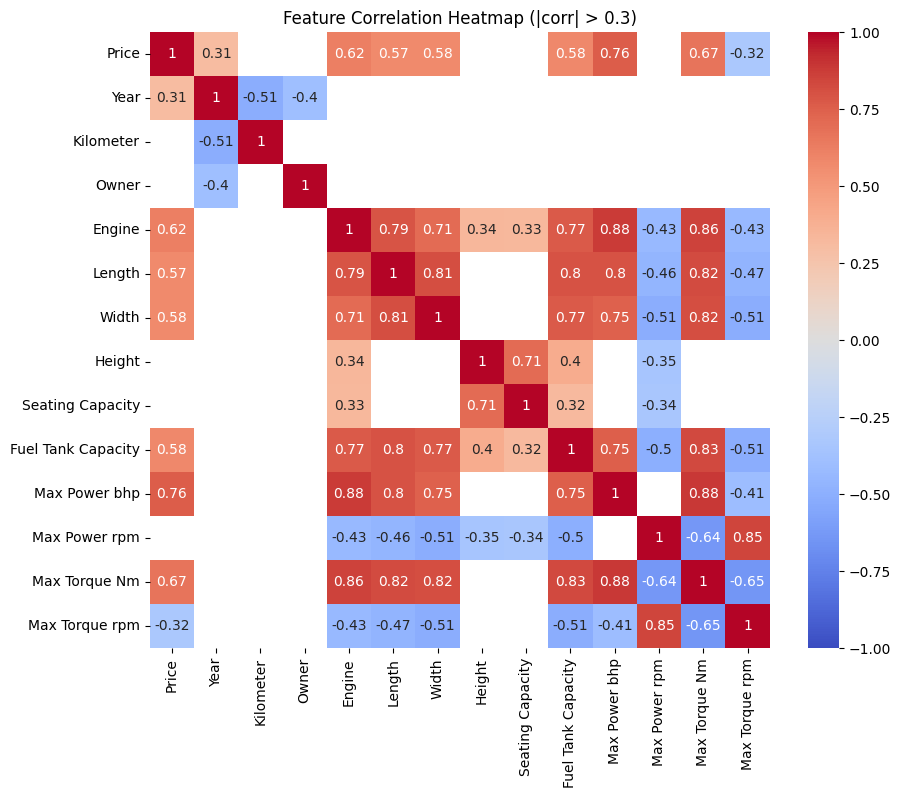

In [16]:
numeric_data = data.select_dtypes(include=['number'])

# Compute correlation
corr_matrix = numeric_data.corr()
filtered_corr = corr_matrix[abs(corr_matrix) > 0.3]
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_corr, cmap="coolwarm", vmin=-1, vmax=1, annot=True)
plt.title("Feature Correlation Heatmap (|corr| > 0.3)")
plt.show()